# Introduction


This notebook concerns the AC-S spectrophotometer located on the Regional Cabled Array
shallow profiler at the Oregon Slope Base site. The instrument operates for two
intervals each day, during local midnight and noon profiler ascents. 


The source data order was large (4GB)
spanning from January 1 through June 1 2021; and across 83 channels. 


The data used here is a subset: 2 channels (28 and 56) and 12 days. The results
fit within the repository. 



The spectrophotometer records both optical absorption (OA) and beam attenuation (BA).
Sampling rate is roughly two samples per second. 



# Part 0. Imports, utilities


This code makes us of additional utilities found in **`SpectrophotometerModule.py`**. 
It also leverages the pre-existing profiler metadata. For more on this see the Technical Guide
notebook in this repository.


In [1]:
# Set up this notebook to use code from an accompanying Python module file
from SpectrophotometerModule import *
print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))


Jupyter Notebook running Python 3


# Part 1. Consolidating source data + load/check

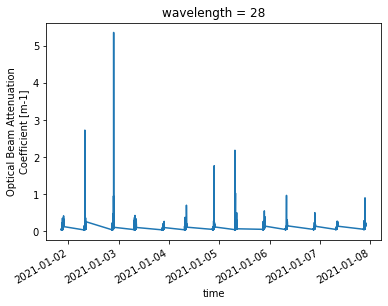

In [2]:
# For data load/prep see SpectrophotometerModule.py.

s = xr.open_dataset('../RepositoryData/rca/optaa/subset2021.nc')
s.ba.sel(wavelength=28).sel(time=slice(dt64_from_doy(2021, 1),dt64_from_doy(2021, 8))).plot()

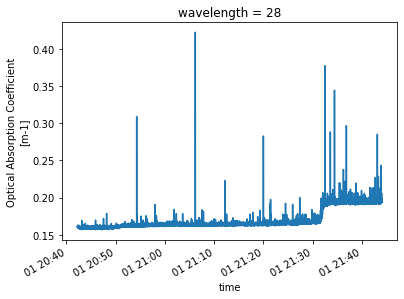

In [3]:
# In profile 'p': index 8 is the first ascent of 2021 where the spectrophotometer collected data
channel = 28
t0 = p["ascent_start"][8]
t1 = p["ascent_end"][8]
ss=s.sel(wavelength=channel).sel(time=slice(t0, t1))
ss.oa.plot()

## Part 2. Beam attenuation and optical absorption charts


The four charting code blocks below demonstrate overlaying ('bundle view') 10 days worth of profiles. 
These are separated into noon and midnight profiles; and since we have both beam attenuation and
optical absorption the total is 2 x 2 = 4 charts. 


The work halts here for the moment (with some coding remarks at the bottom) because the data are quite noisy. 
A single profile takes about 60 minutes; which at 2Hz sampling is 7200 data points. Over ten days
this will come to 70k data points *per channel*. There are about 80 working channels. This sketch
is confined to only three of these: 0 (or 1), 40 and 80. So in summary we have four charts with about
one million data points and a big *gap* in the context needed to go further...

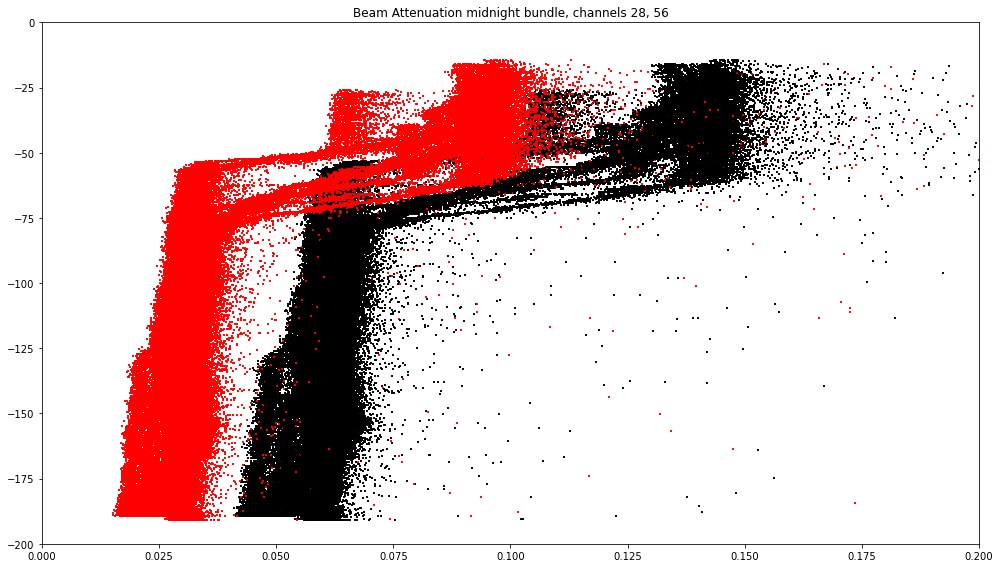

In [4]:
pm = GenerateTimeWindowIndices(p, dt64_from_doy(2021, 1), dt64_from_doy(2021, 12), midn0, midn1)
pn = GenerateTimeWindowIndices(p, dt64_from_doy(2021, 1), dt64_from_doy(2021, 12), noon0, noon1)
nm, nn = len(pm), len(pn)
i0, i1 = 2, 12 

# midnight bundle, beam attenuation    
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nm is 146 for this dataset
    t0, t1 = p["ascent_start"][pm[i]], p["ascent_end"][pm[i]]
    ba = s.sel(wavelength=28).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth            # z is negated depth to imply below sea surface
    ax.scatter(ba, z, marker=',', s=1., color=colorBA28)               # plot: ax.plot(ba, z, ms = 4., color=colorBA40, mfc=colorBA40)
    ba = s.sel(wavelength=56).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(ba, z, marker=',', s=1., color=colorBA56)

ax.set(title = 'Beam Attenuation midnight bundle, channels 28, 56')
ax.set(xlim = (ba_lo, ba_hi), ylim = (-200, 0.))
plt.show()

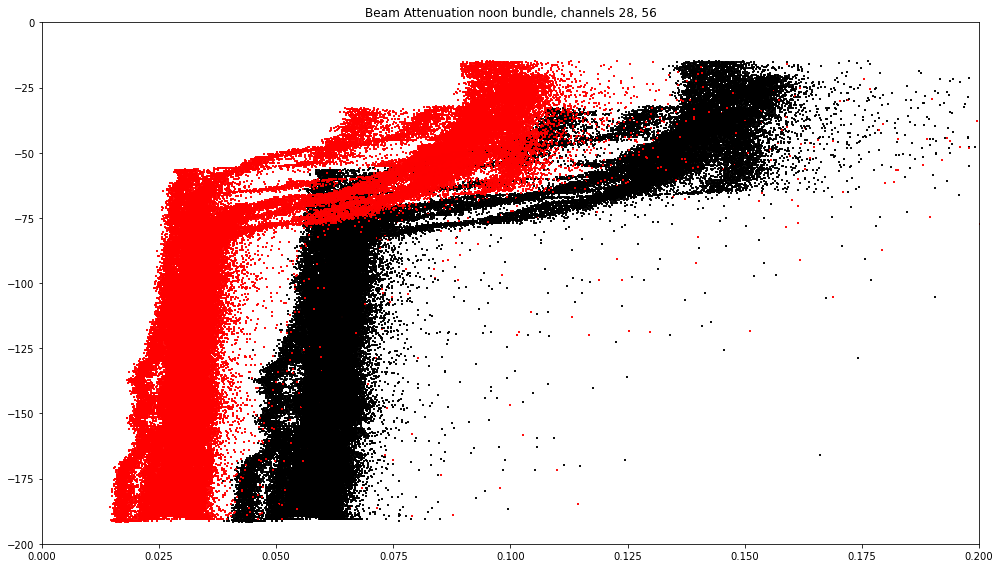

In [5]:
# noon bundle, beam attenuation    
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nm is 149 for this dataset
    t0, t1 = p["ascent_start"][pn[i]], p["ascent_end"][pn[i]]
    ba = s.sel(wavelength=28).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth
    ax.scatter(ba, z, marker=',', s=1., color=colorBA28)
    ba = s.sel(wavelength=56).sel(time=slice(t0,  t1)).ba
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(ba, z, marker=',', s=1., color=colorBA56)

ax.set(title = 'Beam Attenuation noon bundle, channels 28, 56')
ax.set(xlim = (ba_lo, ba_hi), ylim = (-200, 0.))
plt.show()

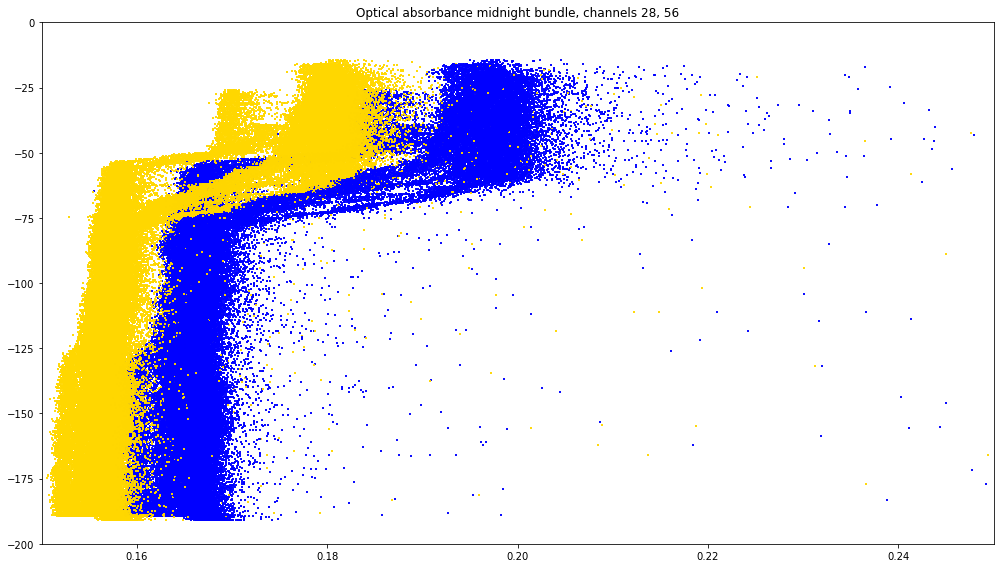

In [6]:
# midnight bundle, optical absorbance  
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nm is 146 for this dataset
    t0, t1 = p["ascent_start"][pm[i]], p["ascent_end"][pm[i]]
    oa = s.sel(wavelength=28).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA28)
    oa = s.sel(wavelength=56).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA56)

ax.set(title = 'Optical absorbance midnight bundle, channels 28, 56')
ax.set(xlim = (oa_lo, oa_hi), ylim = (-200, 0.))
plt.show()

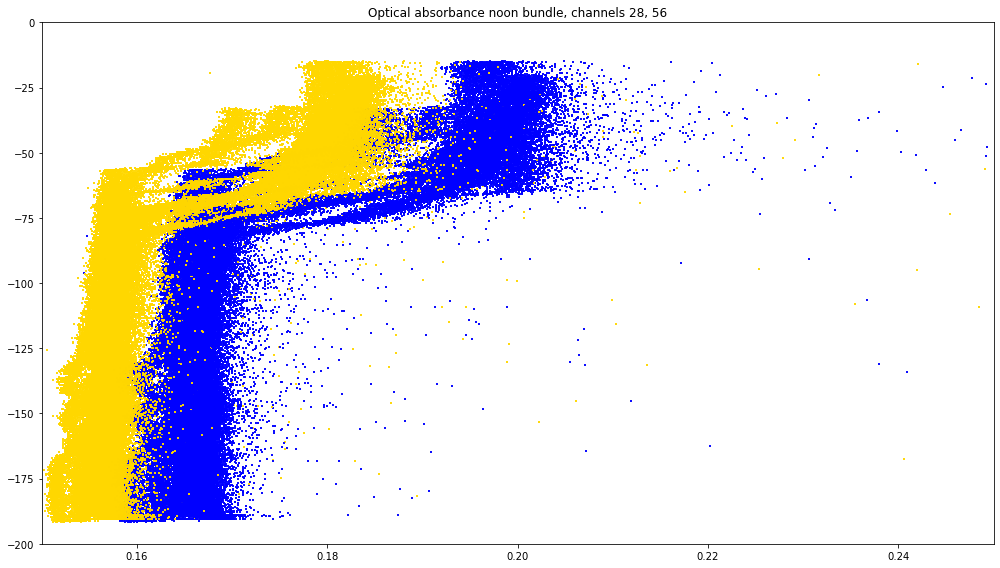

In [7]:
# noon bundle, optical absorbance  
fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True)

for i in range(i0, i1): # nn is 149 for this dataset
    t0, t1 = p["ascent_start"][pn[i]], p["ascent_end"][pn[i]]
    oa = s.sel(wavelength=28).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=28).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA28)
    oa = s.sel(wavelength=56).sel(time=slice(t0,  t1)).oa
    z  = -s.sel(wavelength=56).sel(time=slice(t0, t1)).depth
    ax.scatter(oa, z, marker=',', s=1., color=colorOA56)

ax.set(title = 'Optical absorbance noon bundle, channels 28, 56')
ax.set(xlim = (oa_lo, oa_hi), ylim = (-200, 0.))
plt.show()

### Interpretation


We do have a clear pycnocline structure in the 50 to 75 meter depth range. This suggests building another
data subset to match the March 2021 data found in the BioOptics notebook. 



These data are obviously noisy; so some subject matter expertise is needed to carry the interpretation further.

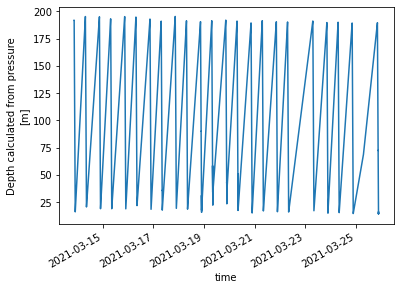

In [8]:
s=xr.open_dataset("../../data/rca/Spectrophotometer/04.nc")
s=s.swap_dims({'obs':'time'})
s.depth.plot()

In [9]:
t0=dt64('2021-03-13')
t1=dt64('2021-03-14')
s=s.sel(time=slice(t0,t1))
# s.time[0] gives 2021-03-13T20:42:16.050669056
# s.time[-1] gives 2021-03-13T21:45:08.062204416
# s gives 14,032 samples, still 83 wavelengths
# s.depth[0], s.depth[-1] gives depth ranging 191.97 to 16.00

In [17]:
u=s.swap_dims({'time':'depth'})

In [18]:
u=u.sortby('depth')

In [19]:
u=u.rename({'depth':'z'})

In [20]:
u=u[['optical_absorption', 'beam_attenuation']]

In [21]:
u=u.rename({'optical_absorption':'oa','beam_attenuation':'ba'})

In [22]:
dz = np.arange(15., 192.2, 0.20)           # 886 values, 885 bins

In [23]:
um=u.groupby_bins('z', dz).mean()

In [24]:
us=u.groupby_bins('z', dz).std()

In [25]:
us

<xarray.Dataset>
Dimensions:     (z_bins: 885, wavelength: 83)
Coordinates:
  * z_bins      (z_bins) object (15.0, 15.2] (15.2, 15.4] ... (191.8, 192.0]
  * wavelength  (wavelength) int32 0 1 2 3 4 5 6 7 8 ... 75 76 77 78 79 80 81 82
Data variables:
    oa          (z_bins, wavelength) float64 nan nan nan ... 0.01312 0.01247
    ba          (z_bins, wavelength) float64 nan nan nan ... 0.01359 0.01329

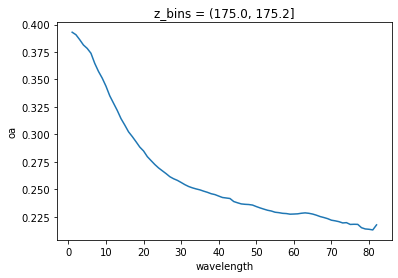

In [32]:
um.oa[800].plot()

In [30]:
x=s.swap_dims({'time':'depth'})
x=x.rename({'depth':'z'})
x=x[['optical_absorption', 'beam_attenuation']]
x=x.rename({'optical_absorption':'oa','beam_attenuation':'ba'})
x=x.sortby('z')

<class 'numpy.ndarray'>
1.3143027111592476


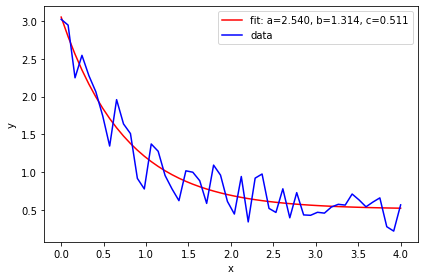

In [49]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c): return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
print(type(ydata))

popt, pcov = curve_fit(func, xdata, ydata)
print(popt[1])

fig,ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Code fragments


The following code pertains to multi-plot building, data subsets and interactive views of the data. 
It should be relocated out of this notebook to the reference material. 


```
# declaring figure and axes
# fig, axs = plt.subplots(fig_n_down, fig_n_across, figsize=(fig_width * fig_n_across, fig_height*fig_n_down), tight_layout=True)

# referencing one of these axes
# axs[day_index][3]

# using index selection 
# .isel(wavelength=oa_plot_wavelength)

################################
# interact example
################################

# intro text:
# We have two charts per day (midnight and noon) and two observation types (OA and BA). This is 2 x 2 charts. 
#   The display is 2 such blocks, left and right, for 4 x 2 charts. When the checkbox is True we use the passed
#   values for the right chart and the stored values for the left. When the checkbox is False we use the passed
#   values for the left chart and the stored values for the right. In either case the updated states are stored
#   in global state variables. If the day is 0 there is no plot. A four-chart state is { day_ba, day_oa, channel_oa }.

# sliders etc set up:
# interact(spectrophotometer_display, \
#          sel_day_ba=widgets.IntSlider(min=1, max=31, step=1, value=9,  continuous_update=False, description='BAtten'),
#          sel_day_oa=widgets.IntSlider(min=1, max=31, step=1, value=9,  continuous_update=False, description='OAbs'),
#          sel_channel_oa=widgets.IntSlider(min=1, max=82, step=1, value=49,  continuous_update=False, description='OA Chan'),
#          right = widgets.ToggleButton(value=False, description='use right charts', disabled=False,
#              button_style='', tooltip='Description', icon='check')
#     )

# corresponding function: 
# def spectrophotometer_display(sel_day_ba, sel_day_oa, sel_channel_oa, right):
```

# Part 3. Residual notes


[`optaa` site at OOI](https://oceanobservatories.org/instrument-class/optaa/)


Spectrophotometer availability from **Oregon Slope Base**.


<BR>
<img src="../Images/spectrophotometer/osb_2019_sp_availability.png" style="float: left;" alt="drawing" width="1200"/>
<div style="clear: left"/>
<BR>
    
    
This figure is courtesy of the Interactive Oceans data portal. 
2019 is somewhat intermittent and stops in September.
    

* AC-S on the Oregon Slope Base shallow profiler: midnight and noon ascents
    * **First is 7:22 Zulu: midnight off the coast of Oregon**
    * RCA shallow profilers execute nine profiles per day from 200m to 5m nominal depths
    * Ascent duration is an hour
    * Nitrate measures on *descent*
    * The ascent minimum depth is five meters but is typically more, varying with sea conditions
* AC-S: optical absorption (**OA**), beam attenuation (**BA**)
    * With time and pressure in dbar; depth in m
    * Instrument sampling rate is ~3.7 samples per second
    * Instrument records 86 spectral channels
        * Light wavelength is ~(400nm + channel number x 4nm)
        * Channel width is ~20nm so channels overlap
        * Signals shift with wavelength
    * Channels 0, 83, 84 and 85 tend to give `nan` values (not usable) for both OA and BA
        * Tend to use channels 2 through 82
    * Both OA and BA data are idiosyncratic
        * The midnight OA data are quantized in a peculiar manner; see charts below
        * The noon OA are *somewhat* quantized but have more reasonable / data-like structure
        * BA data are not fraught with the OA quantization issue
            * Both midnight and noon BA data include substantial noise
            * Variance is also apparent in BA data
            * This suggests filtering by depth bin and possibly discarding outliers
* Un-answered questions
    * Is this particular time interval simply 'instrument fail'?
    * Why are OA data different in midnight versus noon profiles? 
    * Are OA and BA typically combined into a turbidity value?
    * What wavelength ranges are of particular interest?
    * How do these signals compare with fluorometers, nitrate, CTD, pH, etcetera? 
        * OOI site has SME remarks circa 2016 (not illuminating)
* References from OOI
    * [Table of instruments / designators / locations](https://oceanobservatories.org/instrument-series/optaad/)
    * [Spectrophotometer page](https://oceanobservatories.org/instrument-class/optaa/)
    * [Subject Matter Expert evaluation](https://oceanobservatories.org/2016/07/successful-sme-evaluation-spectrophotometer-optaa/)
    * [Code](https://github.com/oceanobservatories/ion-functions/blob/master/ion_functions/data/opt_functions.py)


Paraphrasing the Subject Matter Export evaluation (link above): 


> Dr. Boss (SME) verified 1.5 months of data (April-May 2015): Processing and plotting data using the raw data and vendor calibration files 
> from the AC-S, salinity and temperature from a collocated CTD data to correct absorption and attenuation median spectra and scattering, 
> and data from a collocated fluorometer to cross-check the chlorophyll and POC results.
> 
> Consistency between the sensors suggests that they did not foul during the deployment. Not only did his results show that accurate data 
> was being produced by all the sensors in question, but the AC-S (an extremely sensitive instrument normally deployed for very short periods
> of time) did not drift noticeably during the deployment period, a notable achievement.



From the [sheet on Optical Absorption (**OA**)](https://oceanobservatories.org/wp-content/uploads/2015/10/1341-00700_Data_Product_SPEC_OPTABSN_OOI.pdf):


> The primary instrument (OPTAA) is the WET Labs ac-s spectral absorption and attenuation meter. 
The instrument provides a 75 wavelength output from approximately 400–750 nm with approximately 
4 nm steps. Individual filter steps have a full-width half maximum response that
range between about 10 to 18 nm. 
>
> There are a total of 35 OPTAA instruments deployed
throughout the initial OOI construction and integrated into the Pioneer, Endurance, Regional and
Global arrays. They are deployed at fixed depths (near-surface, mid-water column and sea floor)
and installed on moored profilers.
>
> The ac-s performs concurrent measurements of the water attenuation and absorption 
(the latter called 'OPTABSN').
>
> OPTABSN is a L2 product in that computation requires the raw signals emanating from a properly
calibrated and configured instrument as well as water temperature (TEMPWAT) and practical
salinity (PRACSAL) derived from a co-located and synchronized CTD. 
>
> While small corrections
for salinity are available at visible wavelengths (< 700 nm), temperature and salinity corrections
are more significant at infrared wavelengths (> 700 nm) and must be performed on both the
absorption and attenuation (OPBATTN) signals.


The [beam attenuation (**BA**) sheet](https://oceanobservatories.org/wp-content/uploads/2015/10/1341-00690_Data_Product_SPEC_OPTATTN_OOI.pdf)
is similar. Both give a mathematical basis for the data as well as (MATLAB?) code. 



